In [9]:
from typing import Dict,TypedDict, List
from langgraph.graph import StateGraph

In [10]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    operation: str
    result: str


In [ ]:
def process_values(state: AgentState) -> AgentState:
    """Process a list of values and update the result."""
    if state['operation'] == "*":
        total = 1
        for v in state['values']:
            total *= v
    else:
        total = sum(state['values'])
    state['result'] = f"Hello {state['name']}, the {state['operation']} of your values is {total}."
    return state

In [17]:
graph = StateGraph(AgentState)

graph.add_node("processor", process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")
app = graph.compile()


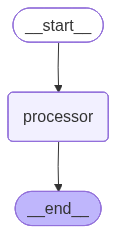

In [18]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [19]:
result = app.invoke({"values": [1, 2, 3, 4], "name": "Teja", "operation": "*"})
result["result"]

'Hello Teja, the * of your values is 24.'